Imagine, we are playing a game in which we can move up or down the stairs according to the roll of the dice.

Let's establish the following rules to play the game:

1.	The player starts the game at the step 0, rolls a single die and moves along the stairs according to the rolls of the die. In total, the player should roll the die 100 times (make 100 moves)
2.	If the die roll is 3, 4 or 5, the player makes one step up the stairs. If the die roll is 1 or 2, the player needs to make one step down (if he is currently at the step 0, he does not make any move). If the die roll is 6, the player needs to roll the die again and make as many steps forward as the new roll of the die shows.

Here, I will calculate the probability of finishing the game at different steps (after 100 moves). To do it, I will simulate 10 000 games like this one in the form of random walks. I will collect the final steps of all the 10 000 games and calculate the percentages corresponding of some steps I am interested in (steps number 0,10, 20, 30, 40, 50, 60, 70, 80, 90 and 100).
I will also calculate which step has the highest probability to be the final step to be reached during the game.

I will also calculate which step has the highest probability to be the final step to be reached during the game.

First, I will simulate 10 000 games and visualize al 10 000 random walks representing all the moves from all the 10000 games:

Text(0, 0.5, 'steps')

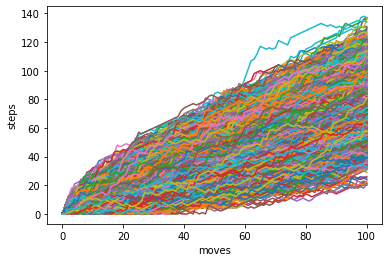

In [1]:
# Import numpy as np
import numpy as np

#Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

#Magic command to display plots
%matplotlib inline 

# Set the seed
np.random.seed(123)

# Roll the dice
dice=np.random.randint(1,7)

# Simulate random walk 10 000 times
all_walks = []   #create a list for all the steps of all the 10000 simulated random walks
for i in range(10000) :
    random_walk = [0]   #initialize random walk
    for x in range(100) :   #100 steps for each random walk
        step = random_walk[-1]   #current step is set to the last step in the random_walk vector
        dice = np.random.randint(1,7)   #rolling the die
        if dice <= 2:   # if the die roll is 1 or 2 
            step = max(0, step - 1)   # then in our random walk we need to make one step back; but we cannot go below 0 at any time
        elif dice <= 5:   #if the die roll is 3,4 or 5 
            step = step + 1   #then we need to make one step forward
        else:   # if the die roll is 6 
            step = step + np.random.randint(1,7)   # we roll the die again and make an amount of steps forward according to the amount of the eyes the die roll shows 
        random_walk.append(step)   #adding a new step to our random walk
    all_walks.append(random_walk)   #adding each random walk to the vector all_walks

# Create and plot np_aw_t
np_aw_t = np.transpose(np.array(all_walks))   #converting all_walks to a np array and trasposing it

plt.plot(np_aw_t)
plt.xlabel('moves')
plt.ylabel('steps')

Now, let me look at the distribution of the final steps.

Text(0, 0.5, 'frequency')

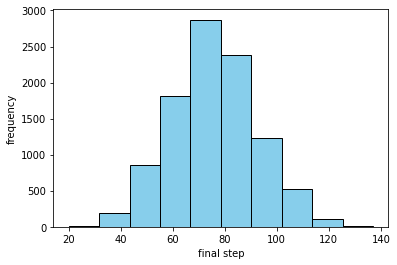

In [2]:
#Selecting only the final steps of all random walks
ends = np_aw_t[-1,:]   

#Plotting a histogram
plt.hist(ends,color='skyblue',edgecolor='black')   
plt.xlabel('final step')
plt.ylabel('frequency')

This histogram represents the distribution of all final steps from 10 000 random walks that we simulated. The range of the final steps that we obtained in the simulations lies between 0 and 140. This range is divided into 10 bins of a size of 14 steps.

As we can see from the histogram, the probability to finish our random walk within the range of the 6th bin, which includes the steps from 70 to 84, is the highest.

Now, I will compute the probabilities of finishing precisely at the steps 0,10,20,30,40,50,60,70,80,90 and 100 of the stairs.

In [3]:
for i in range(0,101,10):
    print('The probability of finishing the game at the step number '+str(i)+' is '+str(sum(x==i for x in ends)/100)+'%',end='\n')

The probability of finishing the game at the step number 0 is 0.0%
The probability of finishing the game at the step number 10 is 0.0%
The probability of finishing the game at the step number 20 is 0.01%
The probability of finishing the game at the step number 30 is 0.0%
The probability of finishing the game at the step number 40 is 0.23%
The probability of finishing the game at the step number 50 is 0.56%
The probability of finishing the game at the step number 60 is 1.61%
The probability of finishing the game at the step number 70 is 2.43%
The probability of finishing the game at the step number 80 is 2.22%
The probability of finishing the game at the step number 90 is 1.43%
The probability of finishing the game at the step number 100 is 0.78%


As we can see from the histogram above, the step with the highest probability to be the final one in our game lies between the steps number 70 and 84. 
Let me now find at which specific step of the stairs a player most probably will finish our game.

In [4]:
a=[]
step_number=[]
for i in range(71,85,1):
   a.append(sum(x==i for x in ends)/10000)
   step_number.append(i)

print('You will most probably finish the game at the step number '+ str(max(step_number))+
      '. The probability of finishing at this step is '+str(max(a)*100)+' %')

You will most probably finish the game at the step number 84. The probability of finishing at this step is 2.68 %
